<strong>IMDB Sentiment Classification using RNN</strong>

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load IMDB dataset - keep only the top 10,000 most frequently occurring words
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 39s 2us/step


In [4]:
# Print dataset summary
print(f"Train sequences: {len(x_train)}, Test sequences: {len(x_test)}")
print(f"Example review (encoded): {x_train[0][:10]}")
print(f"Sentiment: {y_train[0]}")  # 1 = positive, 0 = negative

Train sequences: 25000, Test sequences: 25000
Example review (encoded): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
Sentiment: 1


In [5]:
# Create a reverse lookup dictionary to convert word indices back to words
word_index = imdb.get_word_index()
reverse_word_index = {value + 3: key for key, value in word_index.items()}
reverse_word_index[0] = "<PAD>"      # Padding
reverse_word_index[1] = "<START>"    # Start of sentence
reverse_word_index[2] = "<UNK>"      # Unknown word

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step


In [6]:
# Function to decode a review from integers to words
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i, '?') for i in encoded_review])

In [7]:
# Show an example review and its sentiment
sample_id = 100
print("\nSample Review (encoded):", x_train[sample_id][:10])
print("\nDecoded Review:\n", decode_review(x_train[sample_id]))
print("\nSentiment:", "Positive 😊" if y_train[sample_id] == 1 else "Negative 😞")


Sample Review (encoded): [1, 13, 244, 6, 87, 337, 7, 628, 2219, 5]

Decoded Review:
 <START> i am a great fan of david lynch and have everything that he's made on dvd except for hotel room the 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of <UNK> drawn black and white cartoons that are loud and foul mouthed and unfunny maybe i don't know what's good but maybe this is just a bunch of crap that was <UNK> on the public under the name of david lynch to make a few bucks too let me make it clear that i didn't care about the foul language part but had to keep <UNK> the sound because my neighbors might have all in all this is a highly disappointing release and may well have just been left in the <UNK> box set as a curiosity i highly recommend you don't spend your money on this 2 out of 10

Sentiment: Negative 😞


In [8]:
# Pad sequences so all reviews are the same length (200 words)
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print(f"\nPadded training data shape: {x_train.shape}")


Padded training data shape: (25000, 200)


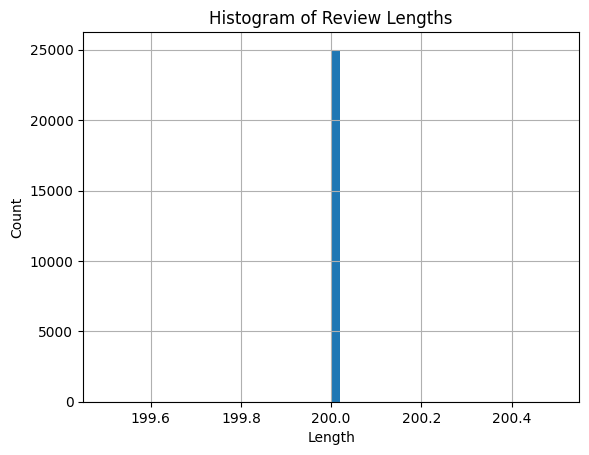

In [9]:
# Plot distribution of review lengths before padding
review_lengths = [len(seq) for seq in x_train]
plt.hist(review_lengths, bins=50)
plt.title("Histogram of Review Lengths")
plt.xlabel("Length")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [10]:
# Build the RNN-based model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=32),       # Embedding layer to convert words to vectors
    SimpleRNN(32, return_sequences=False),               # Vanilla RNN layer with 32 units
    Dense(1, activation='sigmoid')                       # Output layer for binary classification
])

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.6478 - loss: 0.6245 - val_accuracy: 0.8192 - val_loss: 0.4354
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - accuracy: 0.8664 - loss: 0.3400 - val_accuracy: 0.8528 - val_loss: 0.3435
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.9136 - loss: 0.2270 - val_accuracy: 0.8304 - val_loss: 0.3775
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.9454 - loss: 0.1603 - val_accuracy: 0.8168 - val_loss: 0.4001
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.9515 - loss: 0.1395 - val_accuracy: 0.8522 - val_loss: 0.4042


In [14]:
# Evaluate model performance on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8466 - loss: 0.4394

Test Accuracy: 0.8463


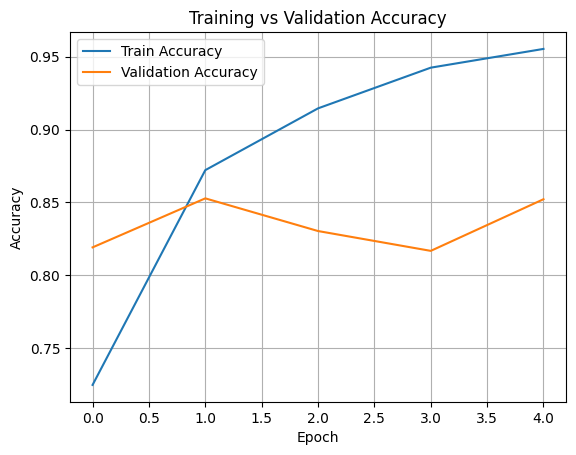

In [15]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

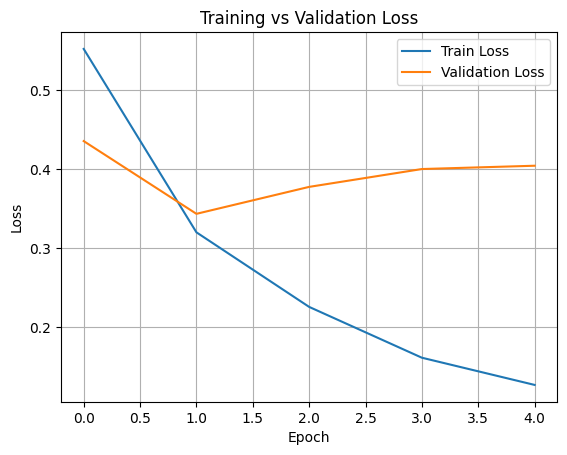

In [16]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\thris\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step


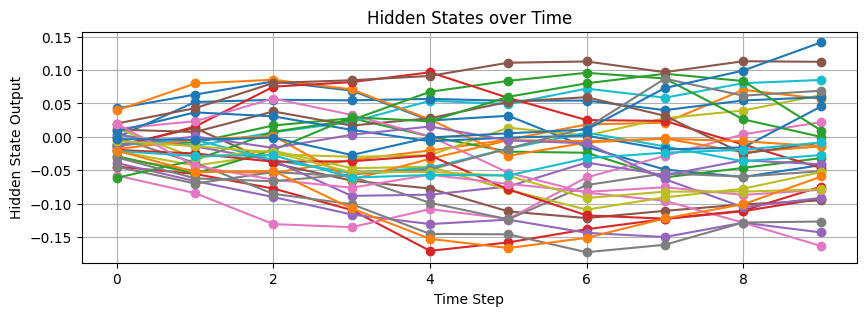

In [17]:
# --------- Optional: Visualize RNN Hidden States for a Short Sequence ---------
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

def plot_rnn_steps(sequence, hidden_states):
    plt.figure(figsize=(10, 3))
    plt.plot(hidden_states, marker='o')
    plt.title("Hidden States over Time")
    plt.xlabel("Time Step")
    plt.ylabel("Hidden State Output")
    plt.grid(True)
    plt.show()

# Select a short padded review sequence
short_seq = x_test[0][:10].reshape(1, 10)  # First 10 words

# Build a separate model that returns outputs at each time step
rnn_step_model = Sequential([
    Embedding(input_dim=num_words, output_dim=32, input_length=10),
    SimpleRNN(32, return_sequences=True)
])

# Get output (hidden states at each time step)
output = rnn_step_model.predict(short_seq)

# Visualize hidden states
plot_rnn_steps(short_seq.flatten(), output[0])

<br><strong>IMDB sentiment classification using LSTM</strong></br>

In [18]:
# Importing required libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb                              # IMDB dataset (pre-tokenized movie reviews)
from tensorflow.keras.preprocessing.sequence import pad_sequences       # Used to pad reviews to same length
from tensorflow.keras.models import Sequential                          # Linear stack of layers
from tensorflow.keras.layers import Embedding, LSTM, Dense              # Layers for model building
import matplotlib.pyplot as plt                                         # For plotting graphs

In [19]:
# Define vocabulary size (only the top 10,000 most frequent words will be used)
num_words = 10000

# Define max review length — all reviews will be padded or truncated to 200 words
maxlen = 200

# Load the IMDB dataset (already tokenized, positive/negative reviews)
# x_train and x_test contain sequences of integers (word indices)
# y_train and y_test are the sentiment labels (0 = negative, 1 = positive)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

In [20]:
# Pad all sequences to the same length (200), so they fit in batches
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [21]:
# Build the LSTM-based model
model_lstm = Sequential([
    Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),  # Embedding layer converts word indices into dense vectors
    LSTM(32),                                                             # LSTM layer with 32 memory units to capture long-term dependencies
    Dense(1, activation='sigmoid')                                        # Output layer with sigmoid for binary classification (0 or 1)
])

In [22]:
# Display the model architecture
model_lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compile the model with optimizer, loss function and metric
model_lstm.compile(
    optimizer='adam',                        # Adam optimizer (efficient and widely used)
    loss='binary_crossentropy',              # Suitable loss function for binary classification
    metrics=['accuracy']                     # Track accuracy during training and evaluation
)

In [25]:
# Train the model using training data
# 20% of training data will be used for validation
history_lstm = model_lstm.fit(
    x_train, y_train,
    epochs=5,                                # Train for 5 epochs (can be increased)
    batch_size=128,                          # Number of samples processed before the model updates
    validation_split=0.2                     # Use 20% of training data for validation
)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 200ms/step - accuracy: 0.6566 - loss: 0.6062 - val_accuracy: 0.8480 - val_loss: 0.3607
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 189ms/step - accuracy: 0.8910 - loss: 0.2761 - val_accuracy: 0.8490 - val_loss: 0.4215
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 194ms/step - accuracy: 0.8963 - loss: 0.2572 - val_accuracy: 0.8704 - val_loss: 0.3121
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 205ms/step - accuracy: 0.9455 - loss: 0.1572 - val_accuracy: 0.8716 - val_loss: 0.3296
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 194ms/step - accuracy: 0.9581 - loss: 0.1308 - val_accuracy: 0.8708 - val_loss: 0.3686


In [26]:
# Evaluate the trained model on test data
test_loss, test_acc = model_lstm.evaluate(x_test, y_test)
print(f"LSTM Test Accuracy: {test_acc:.4f}")  # Display final test accuracy

782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8579 - loss: 0.4074
LSTM Test Accuracy: 0.8567


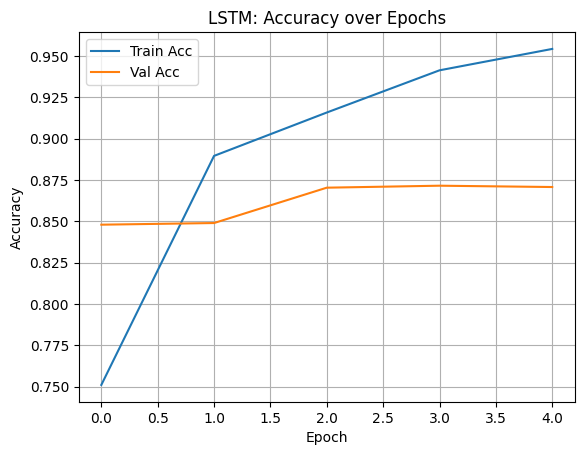

In [27]:
# Plot accuracy over epochs
plt.plot(history_lstm.history['accuracy'], label='Train Acc')
plt.plot(history_lstm.history['val_accuracy'], label='Val Acc')
plt.title('LSTM: Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

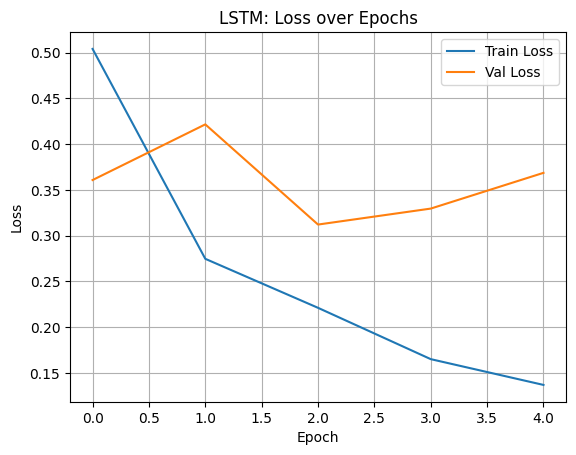

In [28]:
# Plot loss over epochs
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Val Loss')
plt.title('LSTM: Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

<br><strong>IMDB sentiment classification using GRU</strong></br>

In [29]:
# Import TensorFlow and Keras utilities
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
# Set vocabulary size to only include the top 10,000 most frequent words
num_words = 10000

# Limit each review to 200 words (short reviews are padded, long reviews are truncated)
maxlen = 200

In [31]:
# Load IMDB dataset (already tokenized into integers)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Pad all sequences to maxlen (same shape for all reviews)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [32]:
# Build the GRU-based model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

model_gru = Sequential([
    Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),  # Convert word indices to vectors
    GRU(32),                                                              # GRU layer with 32 memory units
    Dense(1, activation='sigmoid')                                        # Output layer for binary classification
])

In [33]:
# Compile the model with optimizer, loss function, and accuracy metric
model_gru.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [34]:
# Show the model architecture
model_gru.summary()

# Train the model on training data (80% train, 20% validation)
history_gru = model_gru.fit(
    x_train, y_train,
    epochs=5,              # Train for 5 epochs
    batch_size=128,        # Process 128 samples at a time
    validation_split=0.2   # Reserve 20% of training data for validation
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 202ms/step - accuracy: 0.6016 - loss: 0.6327 - val_accuracy: 0.8450 - val_loss: 0.3568
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 204ms/step - accuracy: 0.8797 - loss: 0.2964 - val_accuracy: 0.8392 - val_loss: 0.3756
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 199ms/step - accuracy: 0.9144 - loss: 0.2201 - val_accuracy: 0.8690 - val_loss: 0.3250
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 208ms/step - accuracy: 0.9391 - loss: 0.1638 - val_accuracy: 0.8606 - val_loss: 0.3432
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 200ms/step - accuracy: 0.9544 - loss: 0.1327 - val_accuracy: 0.8512 - val_loss: 0.4310


In [35]:
# Evaluate the model on test data
test_loss, test_acc = model_gru.evaluate(x_test, y_test)
print(f"GRU Test Accuracy: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.8469 - loss: 0.4433
GRU Test Accuracy: 0.8467


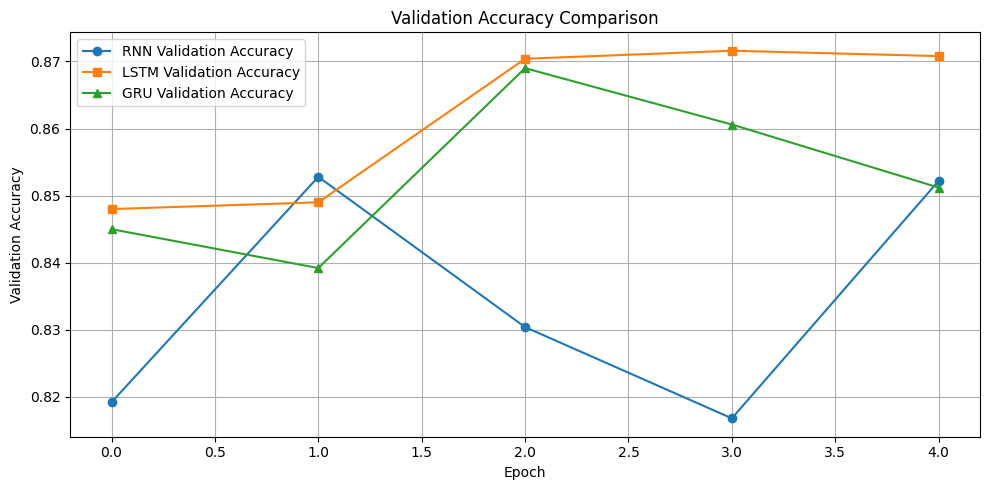

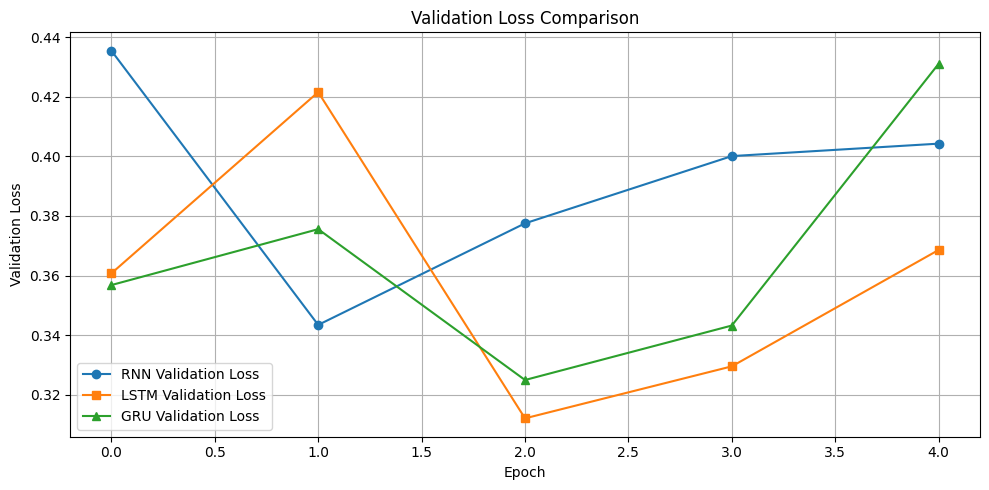

In [36]:
# Final Graph Comparisons: Accuracy and Loss for RNN, LSTM, and GRU

import matplotlib.pyplot as plt

# Step 1: Extract validation accuracy and loss from each model’s training history
val_acc_rnn = history.history['val_accuracy']
val_loss_rnn = history.history['val_loss']

val_acc_lstm = history_lstm.history['val_accuracy']
val_loss_lstm = history_lstm.history['val_loss']

val_acc_gru = history_gru.history['val_accuracy']
val_loss_gru = history_gru.history['val_loss']

# Step 2: Plot Validation Accuracy Comparison
plt.figure(figsize=(10, 5))
plt.plot(val_acc_rnn, label='RNN Validation Accuracy', marker='o')
plt.plot(val_acc_lstm, label='LSTM Validation Accuracy', marker='s')
plt.plot(val_acc_gru, label='GRU Validation Accuracy', marker='^')

plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Plot Validation Loss Comparison
plt.figure(figsize=(10, 5))
plt.plot(val_loss_rnn, label='RNN Validation Loss', marker='o')
plt.plot(val_loss_lstm, label='LSTM Validation Loss', marker='s')
plt.plot(val_loss_gru, label='GRU Validation Loss', marker='^')

plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()